Hasil dengan perhitungan analitik/simbolik:
Fungsi f(x) =
         sin(2⋅x)   sin(3⋅x)   sin(4⋅x)   sin(5⋅x)
sin(x) + ──────── + ──────── + ──────── + ────────
            2          3          4          5    

Turunan/diferensial f'(x) =
cos(x) + cos(2⋅x) + cos(3⋅x) + cos(4⋅x) + cos(5⋅x)

Integral tak tentu ∫ f(x) dx =
          cos(2⋅x)   cos(3⋅x)   cos(4⋅x)   cos(5⋅x)
-cos(x) - ──────── - ──────── - ──────── - ────────
             4          9          16         25   

Integral definit (analitik) [0,10] = 2.186608

Hasil dengan perhitungan numerik:
Hasil turunan/diferensial (di beberapa titik):
x = 0.000 | f(x) =  0.0000 | f'(x) analitik =  5.0000 | f'(x) numerik =  4.9963
x = 1.984 | f(x) =  0.5938 | f'(x) analitik = -1.0952 | f'(x) numerik = -1.0940
x = 3.988 | f(x) = -0.3245 | f'(x) analitik = -0.4686 | f'(x) numerik = -0.4688
x = 5.992 | f(x) = -1.2460 | f'(x) analitik =  2.9446 | f'(x) numerik =  2.9433
x = 7.996 | f(x) =  0.8324 | f'(x) analitik = -0.4971 | f'(x) numerik = 

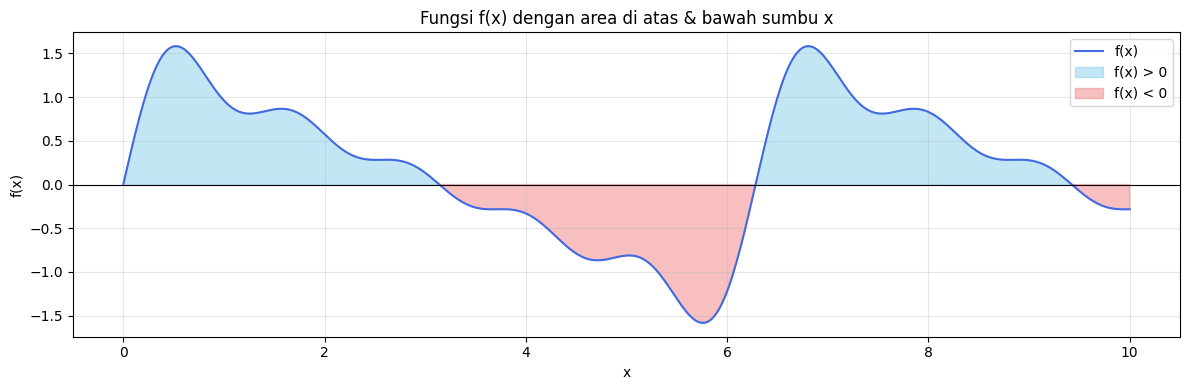

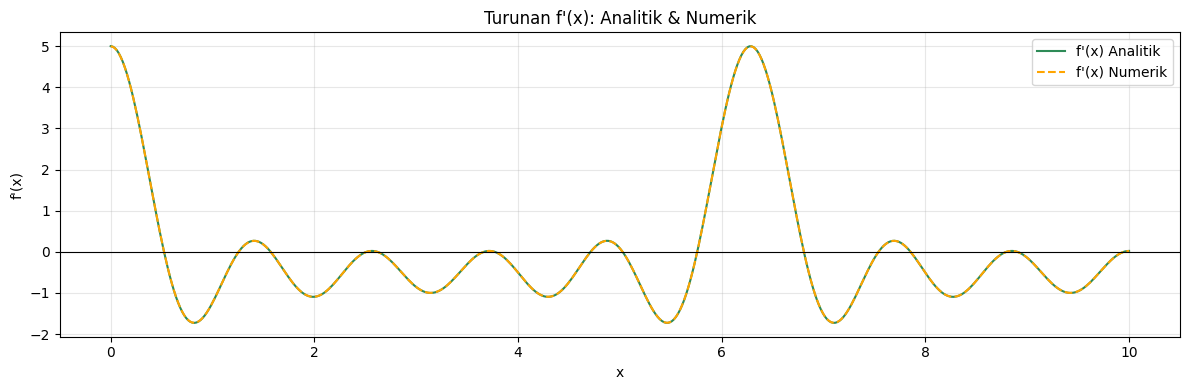

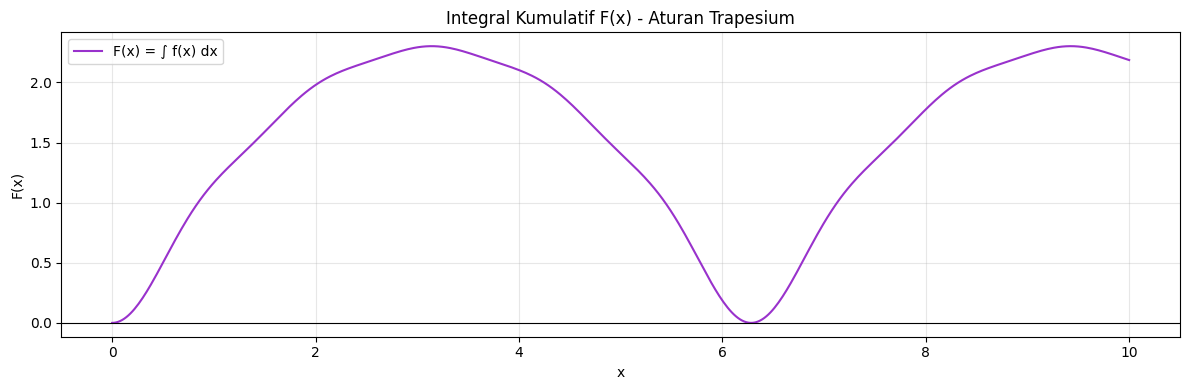

In [4]:
# Nama : Siti Rania Azaria
# NPM  : 24083010072

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson, cumulative_trapezoid
import sympy as sp

# interval
x = np.linspace(0, 10, 500)

# deret fungsi sinusoidal
f = np.sin(x) + 0.5*np.sin(2*x) + (1/3)*np.sin(3*x) + (1/4)*np.sin(4*x) + (1/5)*np.sin(5*x)

# bentuk analitik/simbolik
x_sym = sp.Symbol('x')
f_sym = (sp.sin(x_sym)
         + sp.Rational(1,2)*sp.sin(2*x_sym)
         + sp.Rational(1,3)*sp.sin(3*x_sym)
         + sp.Rational(1,4)*sp.sin(4*x_sym)
         + sp.Rational(1,5)*sp.sin(5*x_sym))

# perhitungan analitik/simbolik
# menghitung turunan simbolik
f_prime_sym = sp.diff(f_sym, x_sym)

# menghitung integral tak tentu simbolik
F_sym = sp.integrate(f_sym, x_sym)

# menghitung integral definit simbolik [0,10]
integral_def_sym = sp.integrate(f_sym, (x_sym, 0, 10))

# turunan: analitik (fungsi nilai) & numerik
# menghitung turunan analitik (dalam bentuk array nilai)
f_prime_analytic = np.cos(x) + np.cos(2*x) + np.cos(3*x) + np.cos(4*x) + np.cos(5*x)

# menghitung turunan numerik (finite difference)
f_prime_numeric = np.gradient(f, x)

# integral numerik
# menghitung integral definit (Simpson)
integral_total = simpson(f, x)

# menghitung integral terpisah di atas & bawah sumbu x
mask_above = f > 0
mask_below = f < 0
integral_above = simpson(f[mask_above], x[mask_above]) if mask_above.any() else 0.0
integral_below = simpson(f[mask_below], x[mask_below]) if mask_below.any() else 0.0

# menghitung integral kumulatif (aturan trapesium)
F = cumulative_trapezoid(f, x, initial=0)

# menampilkan output perhitungan
print("Hasil dengan perhitungan analitik/simbolik:")
print("Fungsi f(x) =")
sp.pprint(f_sym)

print("\nTurunan/diferensial f'(x) =")
sp.pprint(f_prime_sym)

print("\nIntegral tak tentu ∫ f(x) dx =")
sp.pprint(F_sym)

print(f"\nIntegral definit (analitik) [0,10] = {integral_def_sym.evalf():.6f}")

print("\nHasil dengan perhitungan numerik:")
print("Hasil turunan/diferensial (di beberapa titik):")
idx_sample = np.linspace(0, len(x)-1, 6, dtype=int)
for idx in idx_sample:
    xi = x[idx]
    print(f"x = {xi:5.3f} | f(x) = {f[idx]:7.4f} | f'(x) analitik = {f_prime_analytic[idx]:7.4f} | f'(x) numerik = {f_prime_numeric[idx]:7.4f}")

# menghitung selisih/ketepatan turunan dengan perhitungan analitik & simbolik
max_abs_diff = np.max(np.abs(f_prime_analytic - f_prime_numeric))
print("\nKetepatan perhitungan turunan: analitik & numerik")
print(f"Maks. |f'_analitik - f'_numerik| = {max_abs_diff:.6e}")

print("\nHasil integral numerik:")
print(f"Integral definit (Simpson) [0,10] = {integral_total:.6f}")
print(f"Integral bagian atas (f>0) = {integral_above:.6f}")
print(f"Integral bagian bawah (f<0) = {integral_below:.6f}")

# membuat plot f(x) dengan area positif/negatif
plt.figure(figsize=(12,4))
plt.plot(x, f, label='f(x)', color='royalblue')
plt.fill_between(x, f, 0, where=(f>0), color='skyblue', alpha=0.5, label='f(x) > 0')
plt.fill_between(x, f, 0, where=(f<0), color='lightcoral', alpha=0.5, label='f(x) < 0')
plt.axhline(0, color='k', linewidth=0.8)
plt.xlabel('x'); plt.ylabel('f(x)')
plt.title("Fungsi f(x) dengan area di atas & bawah sumbu x")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# membuat plot turunan: analitik & numerik
plt.figure(figsize=(12,4))
plt.plot(x, f_prime_analytic, label="f'(x) Analitik", color='seagreen')
plt.plot(x, f_prime_numeric, '--', label="f'(x) Numerik", color='orange')
plt.axhline(0, color='k', linewidth=0.8)
plt.xlabel('x'); plt.ylabel("f'(x)")
plt.title("Turunan f'(x): Analitik & Numerik")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# membuat plot integral kumulatif
plt.figure(figsize=(12,4))
plt.plot(x, F, label="F(x) = ∫ f(x) dx", color='darkorchid')
plt.axhline(0, color='k', linewidth=0.8)
plt.xlabel('x'); plt.ylabel('F(x)')
plt.title("Integral Kumulatif F(x) - Aturan Trapesium")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()